<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/images/bogdanoff_cover.jpeg" height="150">

# Андан на экономе: домашнее задание 2
</center>


> [He bought? Dump it. He sold? Pump it.](https://www.youtube.com/watch?v=fDpYZU5FAVU)  <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$  📉 📉 📉**Bogdanoff**


In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

#  Портфельная теория Марковица

В этом задании мы будем работать с данными по ценным бумагам. Мы немного поанализируем их и попробуем собрать оптимальный портфель.

- в таблице `stocks.csv` содержится информация об акциях нескольких компаний с $01.01.2014$ по $31.12.2023$ по дням.
- таблице `exchange_rates.csv` содержится информация о курсах валют _USD-RUB_, _EUR-RUB_ и _HKD-RUB_ за тот же период.

Подгрузим данные и посмотрим на них.

In [2]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [3]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


## 1 Причешем данные

Часто при загрузке данных из каких-либо источников, особенно если они разные, у вас будет возникать необходимость в их форматировании. Поэтому в этой части потренируемся корректировать переменные для последующей работы с ними.


__а) [2 балла]__ В колонке `'Дата'` лежат дни, в которые осуществлялась торговля акциями. Превратите её в формат `datetime` в обеих таблицах.

In [4]:
# your code here
# (♡-_-♡)

df_stocks['Дата'] = pd.to_datetime(df_stocks['Дата'],  dayfirst=True)
df_stocks.head()                  

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,2023-12-29,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,2023-12-28,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,2023-12-27,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,2023-12-26,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,2023-12-22,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [5]:
df_rates['Дата'] = pd.to_datetime(df_rates['Дата'], dayfirst=True)
df_rates.head()  

,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,2014-01-01,"45,189","32,855","4,237"
1,2014-01-02,"45,254","33,1","4,269"
2,2014-01-03,"45,114","33,2","4,282"
3,2014-01-04,"45,125","33,248","4,288"
4,2014-01-05,"45,228","33,255","4,289"


__б) [5 баллов]__ Для продолжения работы необходимо перевести столбцы в числовой формат, однако они содержат некорректные символы, которые не позволят сделать это напрямую.

Допишите функцию, которая примет на вход тип данных `string` и:

- Уберет лишнюю точку, разделяющую тысячные разряды в числах (например, $2.024,01 \rightarrow 2024,01$)
- Заменит символ запятой, отделяющий десятичный разряд, на точку (например, $2024,01 \rightarrow 2024.01$)
- Уберет символы `%`, `'B'` (млрд), `'M'` (млн) и `'K'` (тыс)
- Затем изменит тип данных с `string` на `float`
- И домножит на $10^9$, если в исходном значении содержалась `'B'`, на $10^6$, если `'M'`, или на $10^3$, если `'K'`.

In [6]:
def correct_values(value: str):
    corrected_value = str(value).replace('.', '').replace(',', '.').replace('%', '')

    if 'B' in str(value):
        corrected_value = float(corrected_value.replace('B', ''))
        corrected_value *= 10**9 
    elif 'M' in str(value):
        corrected_value = float(corrected_value.replace('M', ''))
        corrected_value *= 10**6
    elif 'K' in str(value):
        corrected_value = float(corrected_value.replace('K', ''))
        corrected_value *= 10**3
    corrected_value = float(corrected_value)

    return corrected_value

In [7]:
correct_values('2.024,01')

2024.01

In [8]:
correct_values('42,67B')

42670000000.0

Примените данную функцию к столбцам `'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'` таблицы `df_stocks` и к столбцам `'EUR_RUB', 'USD_RUB', 'HKD_RUB'` таблицы `df_rates`.

__Hint:__ Для этого можно использовать метод `map` библиотеки `pandas`. Важно также указать параметр `na_action='ignore'`, чтобы пустые значения не передавались в функцию `correct_values`, [(ссылка на документацию).](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

In [9]:
df_stocks['Цена'] = df_stocks['Цена'].map(correct_values, na_action='ignore')
df_stocks['Откр.'] = df_stocks['Откр.'].map(correct_values, na_action='ignore')
df_stocks['Макс.'] = df_stocks['Макс.'].map(correct_values, na_action='ignore')
df_stocks['Мин.'] = df_stocks['Мин.'].map(correct_values, na_action='ignore')
df_stocks['Объём'] = df_stocks['Объём'].map(correct_values, na_action='ignore')
df_stocks['Изм. %'] = df_stocks['Изм. %'].map(correct_values, na_action='ignore')

In [10]:
df_stocks.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,2023-12-29,192.53,193.90,194.40,191.73,42670000.0,-0.54,AAPL
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.0,0.22,AAPL
2,2023-12-27,193.15,192.49,193.50,191.09,47900000.0,0.05,AAPL
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.0,-0.28,AAPL
4,2023-12-22,193.60,195.18,195.41,192.97,37150000.0,-0.55,AAPL


In [11]:
df_rates['EUR_RUB'] = df_rates['EUR_RUB'].map(correct_values, na_action='ignore')
df_rates['USD_RUB'] = df_rates['USD_RUB'].map(correct_values, na_action='ignore')
df_rates['HKD_RUB'] = df_rates['HKD_RUB'].map(correct_values, na_action='ignore')

In [12]:
df_rates.head()

,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,2014-01-01,45.189,32.855,4.237
1,2014-01-02,45.254,33.100,4.269
2,2014-01-03,45.114,33.200,4.282
3,2014-01-04,45.125,33.248,4.288
4,2014-01-05,45.228,33.255,4.289


__в) [5 баллов]__ Поскольку акции компаний торгуются на разных биржах, цены также указаны в различных валютах.
Давайте приведем все к рублям, используя таблицу `df_rates`. Для этого важно знать, что данные по тикерам:

- `'AAPL'` и `'MSFT'` собраны в долларах `USD`
- `'MBGn'` и `'BMWG'` $-$ в евро `EUR`
- `'Tencent'` $-$ в Гонконгских долларах `HKD`
- по остальным $-$ в `RUB`

Давайте сначала объединим таблицы, выполнив операцию `left join` таблицы `df_stocks` с `df_rates` по столбцу `'Дата'`. Для этого будем использовать метод `merge`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [13]:
df_merged = df_stocks.merge(df_rates,on ='Дата', how='left')

df_merged.head() 

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,192.53,193.90,194.40,191.73,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,193.15,192.49,193.50,191.09,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,193.60,195.18,195.41,192.97,37150000.0,-0.55,AAPL,101.467,92.00,11.791


 Затем преобразуем столбцы `'Цена', 'Откр.', 'Макс.', 'Мин.'`, умножив их на соответствующий данной акции курс.

In [14]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",
}


for ticker, curr_pair in stocks_currency_dict.items():
    
    a = df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']].mul((df_merged.loc[df_merged['Тикер'] == ticker, curr_pair].to_numpy()),axis=0) 
    df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']] = a

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.0108,17520.8040,17565.9840,17324.7228,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,17298.3088,17348.3504,17394.8176,17261.6712,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,17628.8005,17568.5623,17660.7450,17440.7843,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,17694.9630,17746.2926,17771.9574,17674.7978,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,17811.2000,17956.5600,17977.7200,17753.2400,37150000.0,-0.55,AAPL,101.467,92.00,11.791


Наконец, мы закончили с первичными преобразованиями и можем приступать к дальнейшему анализу.

## 2 Начало работы с данными

__а) [2 балла]__ Посмотрите наличие пропусков в данных таблицы `df_merged`. Информация по каким тикерам и за какой период отсутствует? Удалите строки с пропущенными данными.

In [15]:
# your code here
# (´｡• ᵕ •｡`)
df_merged.shape

(17572, 11)

In [16]:
df_merged.isnull().sum()

Дата       0
Цена       0
Откр.      0
Макс.      0
Мин.       0
Объём      9
Изм. %     0
Тикер      0
EUR_RUB    0
USD_RUB    0
HKD_RUB    0
dtype: int64

In [17]:
df_merged.dropna(inplace=True)
df_merged.reset_index(inplace=True, drop=True)

In [18]:
df_merged.shape

(17563, 11)

__б) [2 балла]__ Какое количество уникальных тикеров содержится в таблице `df_stocks`?

In [19]:
# your code here
# (◕‿◕)♡
df_stocks['Тикер'].nunique()

7

__в) [2 балла]__  Для каких акций и в какой временной период была зафиксирована наибольшая разность между значениями `'Макс.'` и `'Мин.'` в рублях?

In [20]:
# your code here  
# ♡ (´｡• ω •｡`) ♡
df_merged['Разность'] = abs(df_merged['Макс.'] - df_merged['Мин.'])
fr = df_merged['Разность'].sort_values(ascending=False)
max_difference = df_merged[int(fr.agg(['idxmax'])):int(fr.agg(['idxmax']))+1]

df_merged[df_merged['Разность'] == df_merged['Разность'].max()]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,Разность
10197,2023-07-18,32677.641,31435.947,33340.302,31103.253,64520000.0,3.98,MSFT,102.184,90.9,11.613,2237.049


In [21]:
max_difference['Тикер']

10197    MSFT
Name: Тикер, dtype: object

In [22]:
max_difference['Дата']

10197   2023-07-18
Name: Дата, dtype: datetime64[ns]

In [23]:
df_merged.drop('Разность',axis=1,inplace=True)

__г) [2 балла]__  В какие периоды было продано/куплено акций на наибольшую сумму рублей. Какие это были акции?

__Hint__: Объем — это количество проданных/купленных акций

In [24]:
# your code here 
# (⌒_⌒;)
df_merged['Сумма'] = df_merged['Цена'] * df_merged['Объём']
fr1 = df_merged['Сумма'].sort_values(ascending=False)
fr1

843      3.249826e+12
844      3.144837e+12
834      3.033893e+12
859      2.959557e+12
456      2.632653e+12
             ...     
13769    1.758271e+08
14017    1.396550e+08
14250    1.214400e+08
14190    1.182060e+08
13307    1.156610e+08
Name: Сумма, Length: 17563, dtype: float64

In [25]:
max_summ = df_merged[int(fr1.agg(['idxmax'])):int(fr1.agg(['idxmax']))+1]
max_summ

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,Сумма
843,2020-08-24,9394.1904,9606.168,9612.1392,9250.8816,345940000.0,1.2,AAPL,87.965,74.64,9.61,3.249826e+12


In [26]:
max_summ['Тикер']

843    AAPL
Name: Тикер, dtype: object

In [27]:
max_summ['Дата']

843   2020-08-24
Name: Дата, dtype: datetime64[ns]

In [28]:
df_merged.drop('Сумма',axis=1,inplace=True)

__д) [5 баллов]__  В столбике `'Изм. %'` лежат изменения стоимости ценных бумаг в процентах. При этом для каждой бумаги валюта своя.

Найдите 5 дат, в которые наблюдались наибольшие средние процентные изменения стоимости акций в абсолютном выражении.

__Hint:__ От изменения акций надо взять модуль, а затем посчитать среднее по тикерам для каждой даты.

In [29]:
# your code here
# (＠_＠) 
df_merged['Изм. %'] = df_merged['Изм. %'].abs()

df_merged

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.01080,17520.80400,17565.98400,17324.72280,42670000.0,0.54,AAPL,98.596,90.360,11.429
1,2023-12-28,17298.30880,17348.35040,17394.81760,17261.67120,33830000.0,0.22,AAPL,97.919,89.360,11.325
2,2023-12-27,17628.80050,17568.56230,17660.74500,17440.78430,47900000.0,0.05,AAPL,101.779,91.270,11.731
3,2023-12-26,17694.96300,17746.29260,17771.95740,17674.79780,28810000.0,0.28,AAPL,101.455,91.660,11.734
4,2023-12-22,17811.20000,17956.56000,17977.72000,17753.24000,37150000.0,0.55,AAPL,101.467,92.000,11.791
...,...,...,...,...,...,...,...,...,...,...,...
17558,2014-01-08,416.51786,418.99968,419.81269,415.10579,18870000.0,1.52,Tencent,45.039,33.177,4.279
17559,2014-01-07,409.79112,416.03116,416.03116,408.80810,15020000.0,0.32,Tencent,45.123,33.140,4.274
17560,2014-01-06,411.98177,410.65404,418.53476,407.31330,20380000.0,0.32,Tencent,45.259,33.210,4.283
17561,2014-01-03,410.55816,415.52528,419.29344,409.57330,18600000.0,2.08,Tencent,45.114,33.200,4.282


In [30]:
#В chatGPT написала "pandas:В dataframe отсортировать топ 5 лучших средних значений за день Изм.%"
# Для образца также скинула датафрейм df_merged из пункта д), chatGPT все корректно вывел, не корректировала



grouped = df_merged.groupby('Дата')['Изм. %'].mean()

# Отсортируем значения по убыванию и возьмем топ 5 (лучшие значения)
top5 = grouped.sort_values(ascending=False)[:5]

print(top5)

Дата
2022-02-24    13.081429
2016-02-29    11.840000
2020-03-24    10.795714
2020-03-12    10.615714
2022-02-21     9.128000
Name: Изм. %, dtype: float64


In [31]:
df1 = pd.DataFrame(top5)
#Reset_index смещает названия столбцов в одну строку
top5_ = df1.nlargest(5, 'Изм. %').reset_index()
top5_

,Дата,Изм. %
0,2022-02-24,13.081429
1,2016-02-29,11.840000
2,2020-03-24,10.795714
3,2020-03-12,10.615714
4,2022-02-21,9.128000


__е) [2 балла]__ Сохраните ответ в переменную `top_5_diff` в виде таблички:

| Дата     | Изм. % |
|----------|--------|
| 01/01/01 |   1   |
|    ...   |  ...  |
| 03/01/01 |   3   |

In [32]:
top_5 = { 'Дата': [ '2022-02-24', '2016-02-29', '2020-03-24', '2020-03-12','2022-02-21'],
    'Изм. %': [ 13.081429, 11.840000, 10.795714, 10.615714,9.128000]}
top_5_diff = pd.DataFrame(top_5)

top_5_diff['Дата'] = pd.to_datetime(top_5_diff['Дата'], dayfirst=True,format='%Y/%m/%d')

top_5_diff


,Дата,Изм. %
0,2022-02-24,13.081429
1,2016-02-29,11.840000
2,2020-03-24,10.795714
3,2020-03-12,10.615714
4,2022-02-21,9.128000


__ё) [5 баллов]__ Далее мы будем работать только со средними ценами, поэтому имеет смысл перевести таблицу из длинного формата в широкий

Было:

| Дата     | Цена | Тикер |
|----------|------|-------|
| 01/01/01 |  10  |   A   |
| 02/01/01 |  20  |   A   |
| 03/01/01 |  30  |   A   |
|   ...    | ...  |  ...  |
| 01/01/01 |  15  |   B   |
| 02/01/01 |  30  |   B   |
| 03/01/01 |  60  |   B   |
|   ...    | ...  |  ...  |

Станет:

| Дата     | Цена A | Цена B | ... |
|----------|--------|--------|-----|
| 01/01/14 |   10   |   15   | ... |
| 02/01/14 |   20   |   30   | ... |
| 03/01/14 |   30   |   60   | ... |
|   ...    |  ...   |  ...   | ... |


Это можно сделать по-разному, например, с помощью `pivot_table` ([ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) на документацию)

In [33]:
df_merged_wide = df_merged.pivot_table(index='Дата', columns='Тикер', values='Цена').reset_index()
df_merged_wide

Тикер,Дата,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
0,2014-01-02,653.72500,3780.51916,NaN,2789.90910,1229.99600,418.02048,NaN
1,2014-01-03,641.42400,3788.67372,NaN,2784.88722,1225.41200,410.55816,NaN
2,2014-01-06,645.27030,3756.04441,135.47,2785.23886,1199.87730,411.98177,0.048460
3,2014-01-07,639.27060,3770.02665,NaN,2815.67520,1206.62740,409.79112,NaN
4,2014-01-08,643.96557,3803.54355,137.33,2801.87619,1186.40952,416.51786,0.047910
...,...,...,...,...,...,...,...,...
2602,2023-12-25,NaN,NaN,161.09,NaN,NaN,NaN,0.023195
2603,2023-12-26,17694.96300,NaN,161.00,NaN,34341.33560,NaN,0.023160
2604,2023-12-27,17628.80050,10218.61160,159.86,6378.48993,34141.36890,3343.33500,0.022875
2605,2023-12-28,17298.30880,9834.98436,159.14,6096.43694,33535.02080,3318.22500,0.022695


__ж) [5 баллов]__  Для всех тикеров из таблички `df` постройти картинки с динамикой цен во времени, а также гистограммы цен. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

__Ответ:__  Распределение стоимости акций VTBR, Tencent и GAZP похожи на нормальное, остальные нет. 
В целом, мировой финансовый рынок за последнее время вырос, это можно заметить на примере акций AAPL, BMWG, MSFT. Однако на рынке российских акций за 10 лет произошли большие изменения и рынок вернулся на прежний уровень. 
Кризисы прослеживаются на обоих рынках: в 2023 году прослеживается существенное снижение стоимости ценных бумаг.

In [34]:
# your code here
# (￢_￢)

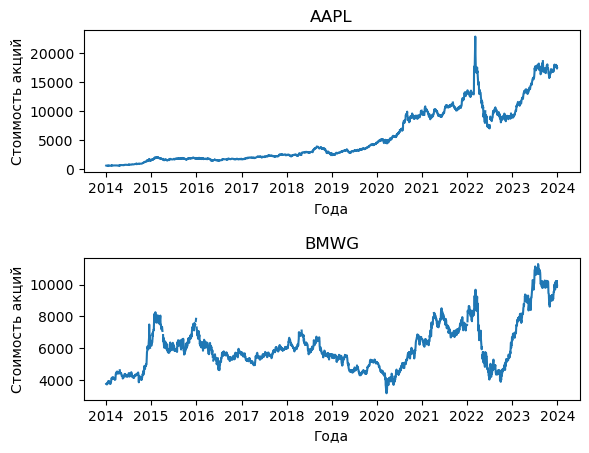

In [35]:
import pylab
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.6, wspace=0.5)
pylab.subplot (2,1, 1)
pylab.plot(df_merged_wide['Дата'],df_merged_wide['AAPL'])
pylab.ylabel('Стоимость акций')
pylab.xlabel('Года')
pylab.title('AAPL')
pylab.subplot (2,1, 2)
pylab.plot(df_merged_wide['Дата'],df_merged_wide['BMWG'])
pylab.title('BMWG')
pylab.ylabel('Стоимость акций')
pylab.xlabel('Года')
pylab.show()

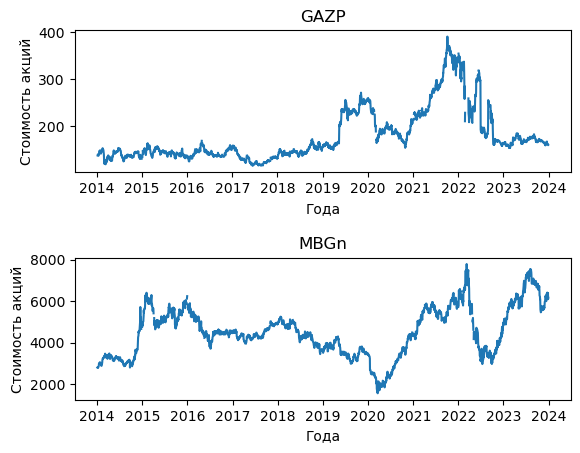

In [36]:
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.6, wspace=0.5)


pylab.subplot (2,1, 1)
pylab.plot(df_merged_wide['Дата'],df_merged_wide['GAZP'])
pylab.title('GAZP')
pylab.ylabel('Стоимость акций')
pylab.xlabel('Года')
pylab.subplot (2,1, 2)
pylab.plot(df_merged_wide['Дата'],df_merged_wide['MBGn'])
pylab.title('MBGn')
pylab.xlabel('Года')
pylab.ylabel('Стоимость акций')
pylab.show()

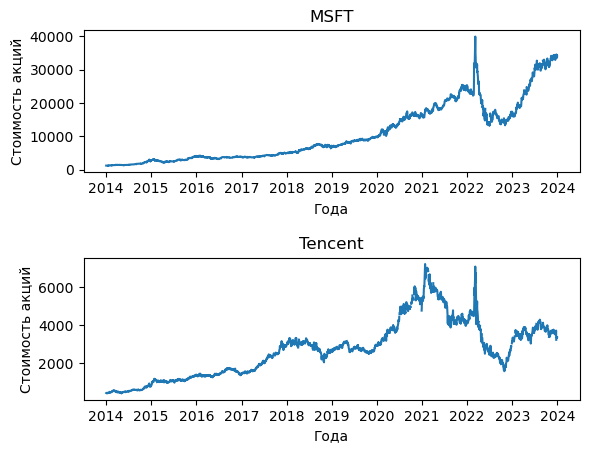

In [37]:
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.6, wspace=0.5)


pylab.subplot (2,1, 1)
pylab.plot(df_merged_wide['Дата'],df_merged_wide['MSFT'])
pylab.title('MSFT')
pylab.xlabel('Года')
pylab.ylabel('Стоимость акций')
pylab.subplot (2,1, 2)
pylab.plot(df_merged_wide['Дата'],df_merged_wide['Tencent'])
pylab.title('Tencent')
pylab.xlabel('Года')
pylab.ylabel('Стоимость акций')
pylab.show()

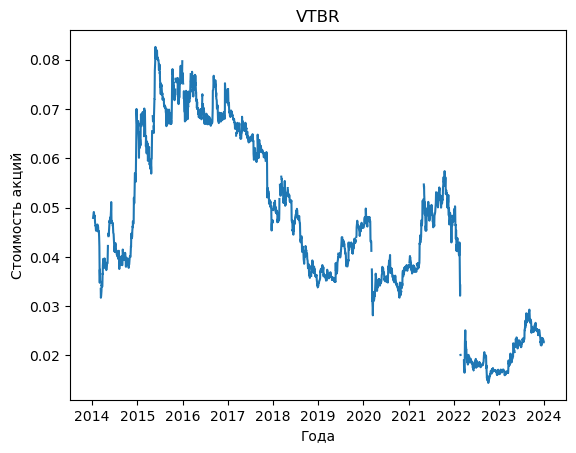

In [38]:
pylab.plot(df_merged_wide['Дата'],df_merged_wide['VTBR'])
pylab.title('VTBR')
pylab.xlabel('Года')
pylab.ylabel('Стоимость акций');

In [39]:
# ПОСТРОИТЬ ГИСТРОГРАММЫ ЦЕН

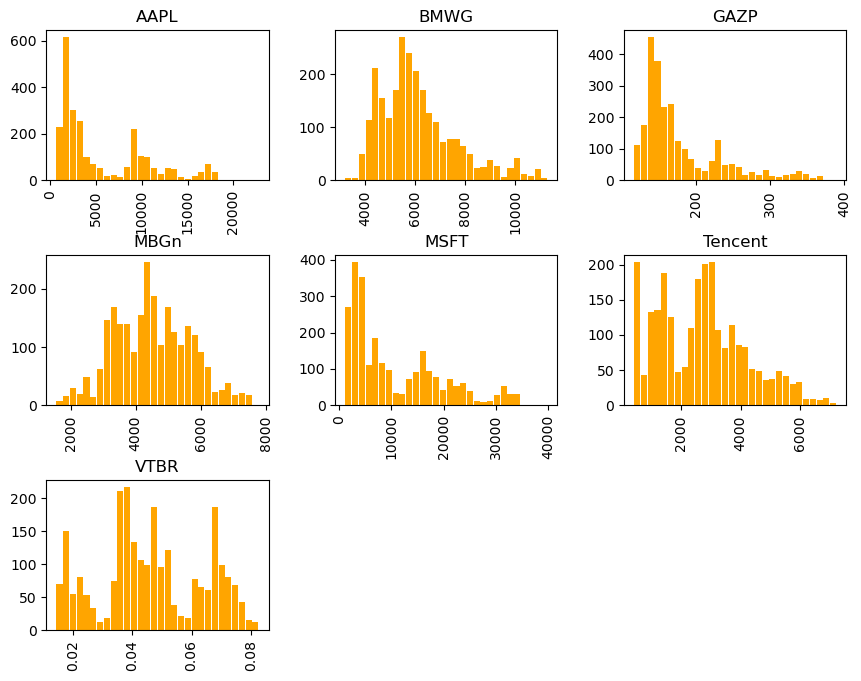

In [40]:
df_merged.hist(by='Тикер', column='Цена', grid=False, rwidth=.9, bins=30, figsize=(10,8), color='orange');

Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени:

$$
R_t = \left( \frac{P_t}{P_{t-1}} - 1 \right) \cdot 100\%.
$$

Под риском обычно имеют в виду стандартное отклонение.


__з) [5 баллов]__  Рассчитайте процентное изменение цены акций в рублях ото дня ко дню для `df`. Полученную таблицу доходностей сохраните в переменную `df_pct_change`.

__Hint__: С этим поможет метод `pct_change()`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [41]:
df_pct_change = pd.DataFrame(
        {'Дата':df_merged_wide['Дата'],
         'AAPL': df_merged_wide['AAPL'].pct_change()*100,
         'BMWG': df_merged_wide['BMWG'].pct_change()*100,
         'GAZP': df_merged_wide['GAZP'].pct_change()*100,
         'MBGn': df_merged_wide['MBGn'].pct_change()*100,
         'MSFT': df_merged_wide['MSFT'].pct_change()*100,
         'Tencent': df_merged_wide['Tencent'].pct_change()*100,
         'VTBR': df_merged_wide['VTBR'].pct_change()*100,
         })
# .dropna()
df_pct_change

,Дата,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
0,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,-1.881678,0.215699,NaN,-0.180002,-0.372684,-1.785157,NaN
2,2014-01-06,0.599650,-0.861233,NaN,0.012627,-2.083764,0.346750,NaN
3,2014-01-07,-0.929796,0.372260,0.000000,1.092773,0.562566,-0.531735,0.000000
4,2014-01-08,0.734426,0.889036,1.372998,-0.490078,-1.675569,1.641505,-1.134957
...,...,...,...,...,...,...,...,...
2602,2023-12-25,0.000000,0.000000,-0.616941,0.000000,0.000000,0.000000,0.957563
2603,2023-12-26,-0.652606,0.000000,-0.055869,0.000000,-0.348287,0.000000,-0.150895
2604,2023-12-27,-0.373906,0.068282,-0.708075,0.020212,-0.582292,3.485307,-1.230570
2605,2023-12-28,-1.874726,-3.754201,-0.450394,-4.421940,-1.775992,-0.751046,-0.786885


__и) [5 баллов]__  Для всех тикеров из таблички `df_pct_change` постройти картинки с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение?
- Видно ли по ящику с усами, что в данных довольно много выбросов?

__Ответ:__ Да, доходности по акциям имеют нормальное распределение. По ящику с усами не заметно большое количество выбросов.

In [42]:
# your code here
# (⊙_⊙)

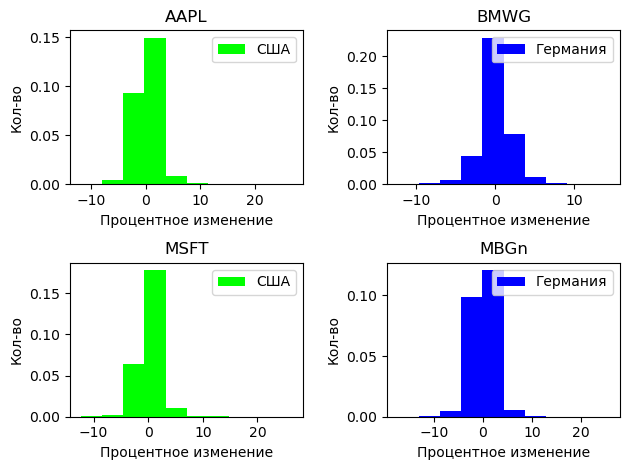

In [43]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist((df_pct_change['AAPL']),  density=True, histtype='bar', color ='lime', label='США')
ax0.set_xlabel('Процентное изменение')
ax0.set_ylabel('Кол-во')
ax0.legend()
ax0.set_title('AAPL')


ax1.hist(df_pct_change['BMWG'], density=True, histtype='bar', stacked=True, color ='blue', label='Германия')
ax1.set_xlabel('Процентное изменение')
ax1.set_ylabel('Кол-во')
ax1.legend()
ax1.set_title('BMWG')


ax2.hist(df_pct_change['MSFT'], density=True, histtype='bar', stacked=True, color ='lime', label='США')
ax2.set_xlabel('Процентное изменение')
ax2.set_ylabel('Кол-во')
ax2.legend()
ax2.set_title('MSFT')


ax3.hist((df_pct_change['MBGn']),  density=True, histtype='bar', color='blue', label='Германия')
ax3.set_xlabel('Процентное изменение')
ax3.set_ylabel('Кол-во')
ax3.legend()
ax3.set_title('MBGn')


fig.tight_layout()
plt.show()


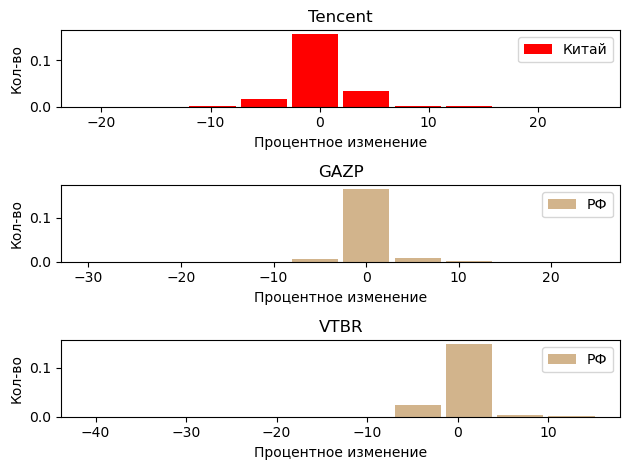

In [44]:
fig, (ax4, ax5,ax6) = plt.subplots(nrows=3, ncols=1)

ax4.hist(df_pct_change['Tencent'], density=True, histtype='bar', stacked=True, rwidth=.9, color = 'red', label='Китай')
ax4.set_xlabel('Процентное изменение')
ax4.set_ylabel('Кол-во')
ax4.legend()
ax4.set_title('Tencent')

ax5.hist(df_pct_change['GAZP'], density=True, histtype='bar', stacked=True, rwidth=.9,color = 'tan',label='РФ')
ax5.set_xlabel('Процентное изменение')
ax5.set_ylabel('Кол-во')
ax5.legend()
ax5.set_title('GAZP')

ax6.hist(df_pct_change['VTBR'], density=True, histtype='bar', stacked=True, rwidth=.9,color = 'tan', label='РФ')
ax6.set_xlabel('Процентное изменение')
ax6.set_ylabel('Кол-во')
ax6.legend()
ax6.set_title('VTBR')

fig.tight_layout()
plt.show()

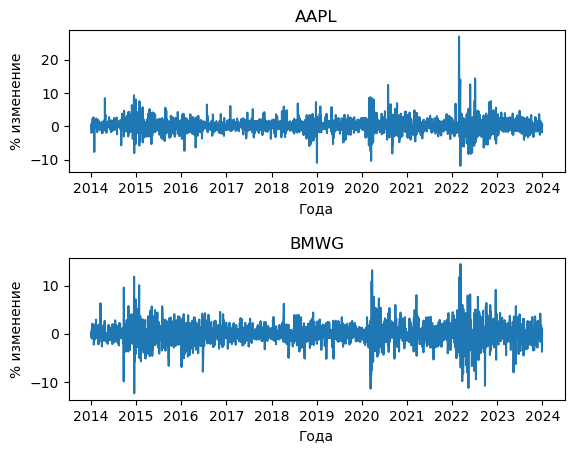

In [45]:
#Динамика доходностей
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.6, wspace=0.5)
pylab.subplot (2,1, 1)
pylab.plot(df_pct_change['Дата'],df_pct_change['AAPL'])
plt.ylabel('% изменение')
plt.xlabel('Года')
pylab.title('AAPL')
pylab.subplot (2,1, 2)
pylab.plot(df_pct_change['Дата'],df_pct_change['BMWG'])
plt.xlabel('Года')
plt.ylabel('% изменение')
pylab.title('BMWG')
pylab.show()

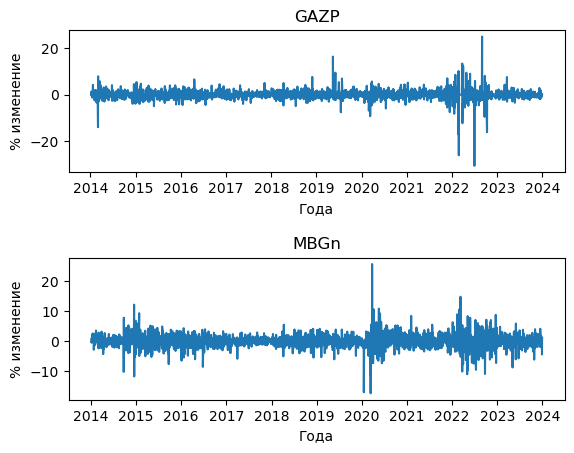

In [46]:
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.6, wspace=0.5)


pylab.subplot (2,1, 1)
pylab.plot(df_pct_change['Дата'],df_pct_change['GAZP'])
plt.xlabel('Года')
plt.ylabel('% изменение')
pylab.title('GAZP')
pylab.subplot (2,1, 2)
pylab.plot(df_pct_change['Дата'],df_pct_change['MBGn'])
plt.xlabel('Года')
plt.ylabel('% изменение')
pylab.title('MBGn')
pylab.show()

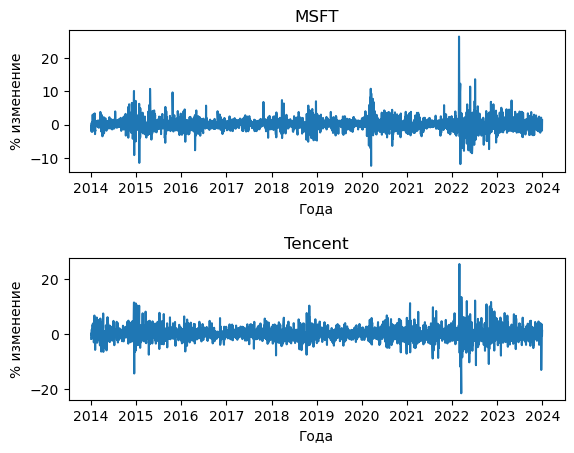

In [47]:
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.6, wspace=0.5)


pylab.subplot (2,1, 1)
pylab.plot(df_pct_change['Дата'],df_pct_change['MSFT'])
plt.xlabel('Года')
plt.ylabel('% изменение')
pylab.title('MSFT')
pylab.subplot (2,1, 2)
pylab.plot(df_pct_change['Дата'],df_pct_change['Tencent'])
plt.xlabel('Года')
plt.ylabel('% изменение')
pylab.title('Tencent')
pylab.show()

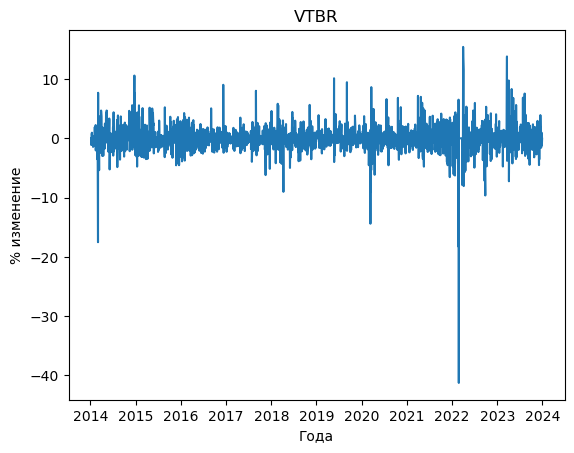

In [48]:
pylab.plot(df_pct_change['Дата'],df_pct_change['VTBR'])
plt.xlabel('Года')
plt.ylabel('% изменение')
pylab.title('VTBR');

In [49]:
# Ящики с усами

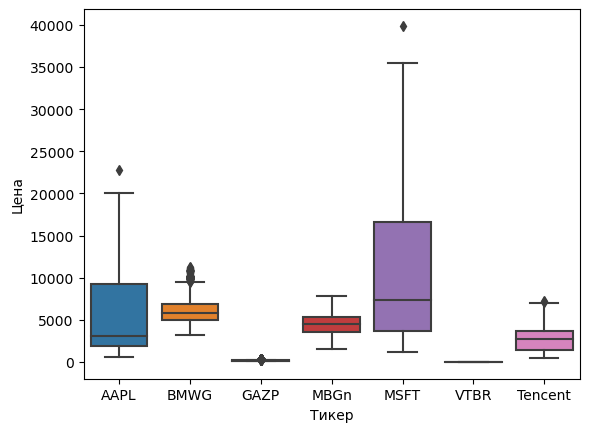

In [50]:
sns.boxplot(x='Тикер', y='Цена', data=df_merged);

__к) [5 баллов]__  В пункте __д)__ мы нашли даты, в которые наблюдались наибольшие измения стоимости ценых бумаг. При расчётах мы проигнорировали колебания курсов валют.

Давайте посмотрим, каким бы было колебание цен акций в абсолютном выражении для дат из таблички `top_5_diff`, если бы мы учли изменения курсов валют.

В таблице `df_pct_change` все доходности измерены в рублях. Посчитайте для этой таблицы построчное среднее для абсолютных значений изменений.

In [51]:
df_pct_change = pd.DataFrame(
        {'Дата':df_merged_wide['Дата'],
         'AAPL': df_merged_wide['AAPL'].pct_change(),
         'BMWG': df_merged_wide['BMWG'].pct_change(),
         'GAZP': df_merged_wide['GAZP'].pct_change(),
         'MBGn': df_merged_wide['MBGn'].pct_change(),
         'MSFT': df_merged_wide['MSFT'].pct_change(),
         'Tencent': df_merged_wide['Tencent'].pct_change(),
         'VTBR': df_merged_wide['VTBR'].pct_change(),
         })

df_pct_change

,Дата,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
0,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,-0.018817,0.002157,NaN,-0.001800,-0.003727,-0.017852,NaN
2,2014-01-06,0.005997,-0.008612,NaN,0.000126,-0.020838,0.003467,NaN
3,2014-01-07,-0.009298,0.003723,0.000000,0.010928,0.005626,-0.005317,0.000000
4,2014-01-08,0.007344,0.008890,0.013730,-0.004901,-0.016756,0.016415,-0.011350
...,...,...,...,...,...,...,...,...
2602,2023-12-25,0.000000,0.000000,-0.006169,0.000000,0.000000,0.000000,0.009576
2603,2023-12-26,-0.006526,0.000000,-0.000559,0.000000,-0.003483,0.000000,-0.001509
2604,2023-12-27,-0.003739,0.000683,-0.007081,0.000202,-0.005823,0.034853,-0.012306
2605,2023-12-28,-0.018747,-0.037542,-0.004504,-0.044219,-0.017760,-0.007510,-0.007869


In [52]:
df_pct_change['Изм. (RUB) %']=df_pct_change[['AAPL','BMWG','GAZP','MBGn','MSFT','Tencent','VTBR']].abs().mean(axis=1)
df_pct_change


,Дата,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR,Изм. (RUB) %
0,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,-0.018817,0.002157,NaN,-0.001800,-0.003727,-0.017852,NaN,0.008870
2,2014-01-06,0.005997,-0.008612,NaN,0.000126,-0.020838,0.003467,NaN,0.007808
3,2014-01-07,-0.009298,0.003723,0.000000,0.010928,0.005626,-0.005317,0.000000,0.004984
4,2014-01-08,0.007344,0.008890,0.013730,-0.004901,-0.016756,0.016415,-0.011350,0.011341
...,...,...,...,...,...,...,...,...,...
2602,2023-12-25,0.000000,0.000000,-0.006169,0.000000,0.000000,0.000000,0.009576,0.002249
2603,2023-12-26,-0.006526,0.000000,-0.000559,0.000000,-0.003483,0.000000,-0.001509,0.001725
2604,2023-12-27,-0.003739,0.000683,-0.007081,0.000202,-0.005823,0.034853,-0.012306,0.009241
2605,2023-12-28,-0.018747,-0.037542,-0.004504,-0.044219,-0.017760,-0.007510,-0.007869,0.019736


Оставьте только те даты, которые встречаются в `top_5_diff`, и добавить их в качестве нового столбца `'Изм. (RUB) %'`

__Hint__: Чтобы выделить список необходимых дат из таблички `top_5_diff`, можно воспользоваться методом `to_list()` применительно к столбцу `'Дата'`. Такой список можно дальше использовать при обращении к строкам в `'[...]'`.

In [53]:
changes = list()
for data in top_5_diff['Дата'].to_list():
    for i in range(3,len(df_pct_change)):
        if data == df_pct_change['Дата'][i]:
            changes.append(df_pct_change['Изм. (RUB) %'][i]*100)   

In [54]:
top_5_diff['Изм. (RUB) %'] = changes

top_5_diff

,Дата,Изм. %,Изм. (RUB) %
0,2022-02-24,13.081429,12.677837
1,2016-02-29,11.840000,1.631587
2,2020-03-24,10.795714,9.703503
3,2020-03-12,10.615714,9.195150
4,2022-02-21,9.128000,5.438385


__л) [2 балла]__  Проинтерпретируете уменьшение/увеличение процентного изменения стоимости акций при пересчете по курсу в рубли.

__Ответ:__ Уменьшение процентного изменения стоимости акций при пересчете по курсу в рубли связано с изменением валютного курса.

## 3 Составляем портфель


Финансовые продукты описываются двумя характеристиками: __доходностью__ и __риском__.

Доходность — это процентное изменение стоимости за некоторый промежуток времени. Под риском, как правило, понимается стандартное отклонение доходности акций.

Однако когда речь идет о нескольких акциях в портфеле, то необходимо учитывать, как связана динамика цен на эти акции: падение доходности одной из акций может быть компенсировано ростом другой. Такой портфель будет предпочтительнее, поскольку предлагает меньшие риски для инвестора.

Осталось найти то самое сладкое сочетание активов... Для поиска оптимальных весов активов в портфеле обычно решается __задача оптимизации.__

Мы поступим проще:

- Будем рассматривать портфель, состоящий всего из 2 тикеров: `'AAPL'` и `'Tencent'`.
- Наилучшее сочетание весов будем искать неоптимальным способом, тупо перебирая различные варианты.

Пусть мы вкладываем долю нашего бюджета $w$ в первую ценную бумагу, а долю $(1 - w)$ во вторую. Тогда ожидаемая доходность порфеля составит

$$
\mathbb{E}(R) = w \cdot \mathbb{E}(R_1)  + (1 - w) \cdot \mathbb{E}(R_2).
$$

Дисперсия портфеля будет равна

$$
\text{Var}(R) = w^2 \cdot \text{Var}(R_1)  + (1 - w)^2 \cdot \text{Var}(R_2) + 2 \cdot w \cdot \text{Cov}(R_1, R_2).
$$

Ковариацию, по её определению, можно переписать как

$$
\text{Cov}(R_1, R_2) = \text{Corr}(R_1, R_2) \cdot \sigma(R_1) \cdot \sigma(R_2),
$$

где $\sigma(R_i) = \sqrt{ \text{Var}(R_i)}$.


Для начала создадим веса, которые будем рассматривать.

__а) [2 балла]__ С помощью функции `np.arange()` создайте `array` от $0$ до $1$ с шагом $0.01$ [(ссылка на документацию).](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [55]:
w = np.arange(0,1,0.01)
w

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

Теперь запишем необходимые характеристики акций в соответствующие переменные:

__б) [3 балла]__ В переменные `r1` и `r2` сохраните среднюю доходность акций `'AAPL'` и `'Tencent'` из `df_pct_change`. Убедитесь, что доходности представлены не в процентах, а в виде чисел. Например не $10\%$, а $0.1$.

Кроме того, поскольку стандартной мерой доходности является годовая доходность, преобразуем среднюю ежедневную доходность в годовую, используя формулу сложного процента для полученных значений:

$$
r_{\text{год}} = (1 + r_{\text{день}})^{252} - 1,
$$

где:
- $r_{\text{год}}$ - ожидаемая годовая доходность,
- $r_{\text{день}}$ - средняя ежедневная доходность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

In [56]:
r1 = df_pct_change.dropna()['AAPL'].mean()
r2 = df_pct_change['Tencent'].mean()
r1,r2 

(0.0014811640485059127, 0.0011308938501601818)

In [57]:
r1 = (1+r1)**252 - 1
r2 = (1+r2)**252 - 1
r1,r2

(0.4520512154948866, 0.3295283131928597)

In [58]:
sd1 = df_pct_change['AAPL'].std()
sd2 = df_pct_change['Tencent'].std()

In [59]:
sd1 = sd1 * np.sqrt(252)
sd2 = sd2 * np.sqrt(252)

sd1,sd2

(0.3315605806599849, 0.4092074682339811)

__в) [1 балл]__ В переменную `rho` сохраните корреляцию между акциями.

In [60]:
rho = df_pct_change['AAPL'].corr(df_pct_change['Tencent'])
rho

0.2631413215824041

Теперь посчитаем доходность и волатильность портфеля, используя соответствующие формулы

In [61]:
r_p2 = w * r1 +(1 - w) * r2
sd_p2 = np.sqrt(w**2 * sd1**2 + (1 - w)**2 * sd2**2 + 2 * w * (1 - w) * rho * sd1 * sd2)

__г) [5 баллов]__ Постройте линейный график в осях (`sd_p2`, `r_p2`)

__Hint:__ Можно сделать с помощью `plt.plot(x, y)`

In [62]:
# your code here
# ┌(ಠ_ಠ)┘
# plt.plot(sd_p2, r_p2);

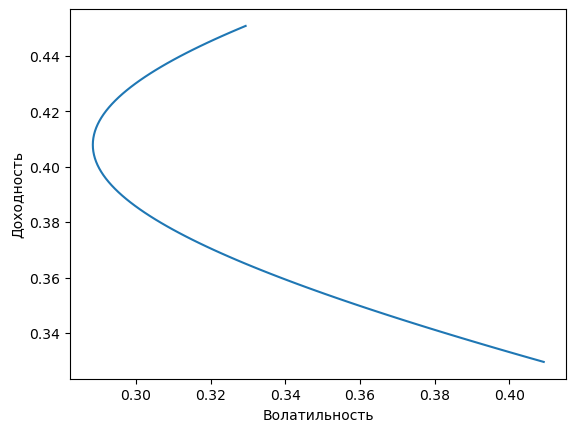

In [63]:
plt.plot(sd_p2, r_p2)
plt.xlabel('Волатильность')
plt.ylabel('Доходность');

Получившаяся у вас картинка должна быть похожа на такую:

<center>
<img src="https://investprofit.info/wp-content/uploads/2018/08/Frontier1.png" height="450">
</center>

В портфельной теории Марковица эта кривая называется эффективной границей (или кривой эффективностию). Её можно поделить на три зоны:

- **Эффективная граница (Efficient Frontier)** — это часть кривой, которая лежит выше портфеля с минимальной дисперсией (риском). Портфели на этом участке предлагают наилучшее сочетание риска и доходности. Другими словами, для любого данного уровня риска, портфели на эффективной границе предлагают максимальную возможную доходность.
- **Портфели ниже эффективной границы** считаются неэффективными, так как для того же уровня риска можно добиться большей доходности.
- **Портфели выше эффективной границы** обычно не существуют, так как они предполагали бы получение более высокой доходности при том же уровне риска.

Найдем портфель с минимальной дисперсией (риском).

__д) [3 балла]__ Для этого сначала создадим табличку со столбцами `'Вес'`, `'Риск'` и `'Доходность'` (содержащими `w`, `sd_p2` и `r_p2` соответственно)

In [64]:
df_r = pd.DataFrame({'Вес': pd.Series(w), 'Риск':pd.Series(sd_p2) , 'Доходность':pd.Series(r_p2)})
df_r

,Вес,Риск,Доходность
0,0.00,0.409207,0.329528
1,0.01,0.406000,0.330754
2,0.02,0.402819,0.331979
3,0.03,0.399664,0.333204
4,0.04,0.396536,0.334429
...,...,...,...
95,0.95,0.320974,0.445925
96,0.96,0.322992,0.447150
97,0.97,0.325060,0.448376
98,0.98,0.327178,0.449601


__е) [3 балла]__ Теперь найдем портфель с минимальным риском и запишем его в переменную `min_sd_p`, а само значение минимального риска в `min_sd`

In [65]:
min_sd_p = df_r.sort_values(by='Риск')[:1]
min_sd = min_sd_p['Риск']
min_sd_p

,Вес,Риск,Доходность
64,0.64,0.288412,0.407943


In [66]:
min_sd_p['Доходность']

64    0.407943
Name: Доходность, dtype: float64

In [67]:
df_r['Доходность']

0     0.329528
1     0.330754
2     0.331979
3     0.333204
4     0.334429
        ...   
95    0.445925
96    0.447150
97    0.448376
98    0.449601
99    0.450826
Name: Доходность, Length: 100, dtype: float64

__ж) [3 балла]__ Выберем множество эффективных портфелей из `df_r`, тех, чья доходность и риск выше, чем у `min_sd_p` и сохраним их в `df_eff_p`

In [68]:
df_eff_p = df_r[(df_r['Доходность'] > min_sd_p['Доходность'].min()) & (df_r['Риск'] > min_sd_p['Риск'].min())]
df_eff_p

,Вес,Риск,Доходность
65,0.65,0.288450,0.409168
66,0.66,0.288560,0.410393
67,0.67,0.288741,0.411619
68,0.68,0.288994,0.412844
69,0.69,0.289317,0.414069
70,0.70,0.289711,0.415294
71,0.71,0.290175,0.416520
72,0.72,0.290710,0.417745
73,0.73,0.291314,0.418970
74,0.74,0.291988,0.420195


__з) [3 балла]__ А теперь на основе `df_eff_p` построим эффективную границу, о которой шла речь раньше (часть кривой выше портфеля с наименьшей волатильностью)

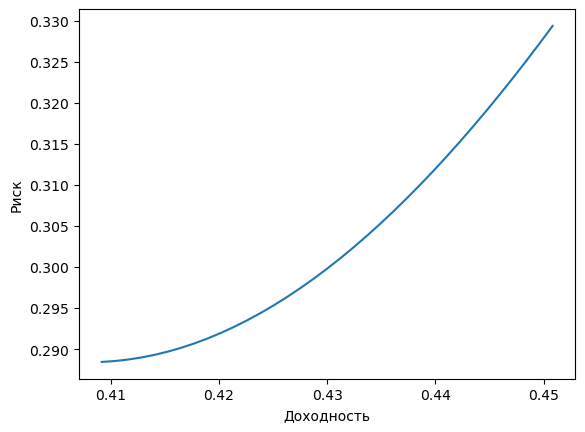

In [69]:
# your code here
# [✖‿✖]
plt.plot(df_eff_p['Доходность'],df_eff_p['Риск'])
plt.xlabel('Доходность')
plt.ylabel('Риск');

Выше мы говорили, что для поиска оптимального портфеля необходимо решать задачу оптимизации. Целевую функцию для её решения можно определить по-разному. Выше мы занимались минимизацией риска и нашли `min_sd_p`.

Кроме минимизации риска можно попытаться максимизировать **коэффициент Шарпа.** Он рассчитывается по формуле

$$
SR = \frac{r_{p} - r_{f}}{\sigma_{p}},
$$

где $r_{p}$  —  ожидаемая доходность портфеля, $r_{f}$  —  безрисковая ставка доходности, $\sigma_{p}$ — стандартное отклонение доходности портфеля.

Коэффициент Шарпа отражает премию за принятый риск. Любая инвестиционная стратегия, демонстрирующая более крутой наклон кривой Шарпа, предлагает более высокую ожидаемую доходность для данного уровня риска. Следовательно, более высокий коэффициент Шарпа всегда предпочтительнее, независимо от того, какой уровень риска вы готовы принять.

В качестве безрисковой ставки доходности выберем доходность российских государственных облигаций сроком 10 лет (можно посмотреть [тут](https://cbr.ru/hd_base/zcyc_params/))

In [70]:
r_f = 11.8/100

__и) [3 балла]__ Теперь у нас есть возможность рассчитать коэффициент Шарпа для кадждого портфеля в `df_r`. Для этого необходимо вычесть из доходности портфеля безрисковую ставку (`r_f`) и разделить на волатильность (риск) портфеля. Сохраните полученные значения в столбец `'Sharp'` таблицы `df_r`

In [71]:
df_r['Sharp'] = (df_r['Доходность']-r_f)/df_r['Риск']
df_r

,Вес,Риск,Доходность,Sharp
0,0.00,0.409207,0.329528,0.516922
1,0.01,0.406000,0.330754,0.524023
2,0.02,0.402819,0.331979,0.531203
3,0.03,0.399664,0.333204,0.538462
4,0.04,0.396536,0.334429,0.545800
...,...,...,...,...
95,0.95,0.320974,0.445925,1.021656
96,0.96,0.322992,0.447150,1.019068
97,0.97,0.325060,0.448376,1.016353
98,0.98,0.327178,0.449601,1.013517


__и) [3 балла]__ Определите портфель с максимальным коэффициентом Шарпа, сохраните его в переменную `max_sharp_p`, а значение самого коэффициента - в переменную `max_sharp`

In [72]:
max_sharp = df_r[df_r["Sharp"] == df_r["Sharp"].max()]
max_sharp_p = df_r["Sharp"].max()
max_sharp_p

1.0407699819677732

Рассмотрим прямую в осях (Риск - Доходность), выраженную формулой

$$ r = max\_sharp \cdot \sigma + r_f $$

Для того, чтобы ее провести, нам необходимо задать хотя бы 2 точки. Чтобы построенный график хорошо выглядел, рассмотрим $\sigma$, равную:

1. наименьшему значению риска портфелей на эффективной кривой (`min_sd`)
2. значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа (из `max_sharp_p`)

__к) [3 балла]__ В переменную `sigma` сохраните `numpy.array` с двумя перечисленными выше значениями

In [73]:
sigma = np.array([min_sd,max_sharp['Риск']])
sigma

array([[0.28841208],
       [0.29859803]])

__л) [3 балла]__ В переменную `r` сохраните значения доходности, находящиеся на указанной прямой, для значений риска из `sigma` (необходимо использовать формулу прямой)

In [74]:
r =  max_sharp_p * sigma + r_f
r

array([[0.41817064],
       [0.42877186]])

__м) [5 баллов]__ Теперь построим эффективную границу, что мы уже делали ранее, и проведем указанную прямую (вернее ее часть).

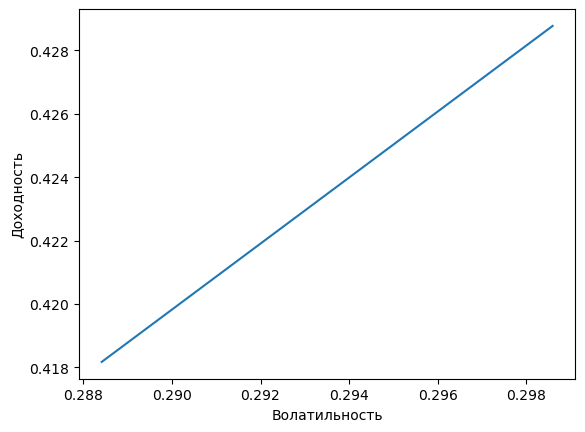

In [75]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]


plt.plot(sigma,r)
plt.xlabel('Волатильность')
plt.ylabel('Доходность');

Полученная прямая является касательной к эффективной кривой, а точка ее касания представляет собой так называемый тангенциальный портфель.

Каждая точка на прямой Шарпа представляет собой портфель, состоящий из комбинации безрискового актива (в нашем случае, государственных облигаций) и рыночного портфеля (здесь, сочетание двух акций).

Все портфели на прямой Шарпа считаются эффективными в смысле оптимального соотношения риска и доходности. Это означает, что для любого данного уровня риска портфель на этой линии предоставляет максимально возможную доходность.

__н) [3 балла]__ Проинтерпретируйте численное значение наибольшего коэффициента Шарпа (`max_sharp`)

**Ответ:** Коэффициент Шарпа показывает во сколько раз уровень избыточной доходности выше уровня риска инвестиции.  Коэффициент Шарпа ≈ 1.04 (>1), следовательно высокая результативность управления портфелем. Данный портфель привлекателен для вложения. 

Таким образом, мы немного углубились в портфельную теорию и рассмотрели 2 основных метода оптимизации структуры портфеля:
- поиск наименее волатильного (рискового) портфеля
- поиск портфеля с оптимальным соотношением доходности и риска.